<h2>Описание проекта</h2>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h2>Описание данных</h2>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<h2>Откроем файлы с данными и изучим общую информацию</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from math import ceil
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv') 

In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15861,My Ballet Studio,DS,2009.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E
5013,Silent Scope,PS2,2000.0,Shooter,0.19,0.15,0.0,0.05,63.0,tbd,M
4508,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,0.31,0.11,0.0,0.01,NaN,NaN,NaN
15679,Germany's Next Topmodel 2011,Wii,2011.0,Simulation,0.00,0.02,0.0,0.00,NaN,NaN,NaN
14908,Justice League Heroes: The Flash,GBA,2006.0,Action,0.02,0.01,0.0,0.00,72.0,7.4,E10+


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
"Количество дубликатов: {}".format(data.duplicated().sum())

'Количество дубликатов: 0'

In [7]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.01
Platform,0
Year_of_Release,1.61
Genre,0.01
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.32
User_Score,40.09


<h2>Подготовка данных</h2>

In [8]:
data.columns=data.columns.str.lower()

In [9]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
null_user_score=data[data['user_score'].isnull()]

In [11]:
user_score_without_null=data.fillna(0)

In [12]:
tbd=user_score_without_null.query('user_score=="tbd"')

In [13]:
data['user_score']=data['user_score'].replace('tbd','Nan')

In [14]:
data['user_score'] = data['user_score'].astype('float')

In [15]:
platform_user_score_mean=data.groupby('platform')['user_score'].transform('mean')

In [16]:
data['user_score'].fillna(platform_user_score_mean,inplace=True)

In [17]:
data = data.dropna(subset = ['name'])

In [18]:
data = data.dropna(subset = ['year_of_release'])

In [19]:
genre_pivot_table = data.pivot_table(index = 'genre', values = ["critic_score","user_score"], aggfunc = ['median'])
genre_pivot_table = data.pivot_table(index = 'genre', values = ["critic_score","user_score"], aggfunc = ['median'])
genre_pivot_table.columns = ['critic_score','user_score']

In [20]:
data.loc[data.loc[:,'rating'].isnull(),'rating'] = 'wait'

In [21]:
data['total_sales'] = data.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [22]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,15347.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.186653,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.088389,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.742679,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.228266,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,7.865432,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


<h2>Анализ данных</h2>

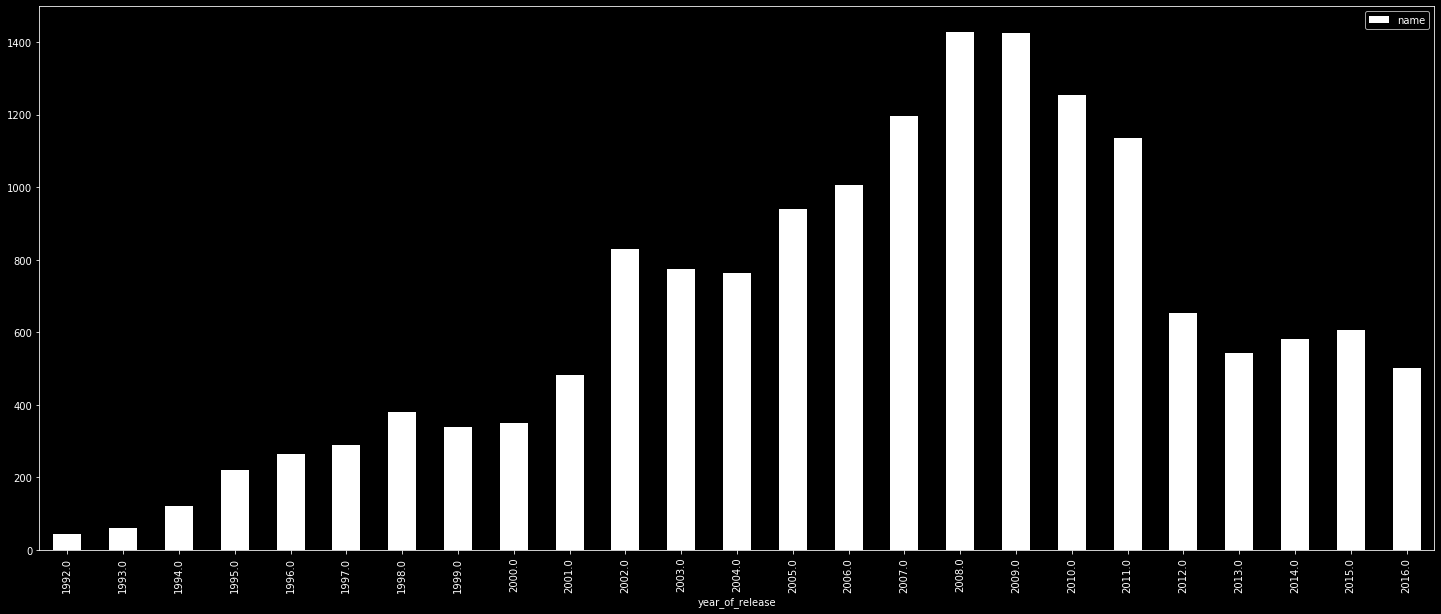

In [23]:
years_groupby = data.groupby('year_of_release').agg({'name':'count'})
with plt.style.context('dark_background'):
    years_groupby.loc[1992:].plot(y = 'name', kind= 'bar', figsize = (25,10), color = 'w')

Больше всего игр было выпущено в период с 2005 по 2012 год

In [24]:
platform_pivot_table_years = data.pivot_table(index=['platform','year_of_release'], values = 'total_sales', aggfunc = 'sum')
platform_pivot_table_years['years'] =  platform_pivot_table_years.index
platform_pivot_table_years['years'] = platform_pivot_table_years['years'].apply (lambda row: row[1]).astype('int')

In [25]:
pd.DataFrame(round((platform_pivot_table_years),2)).style.background_gradient('coolwarm')

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Красивая, но сложная для анализа таблица

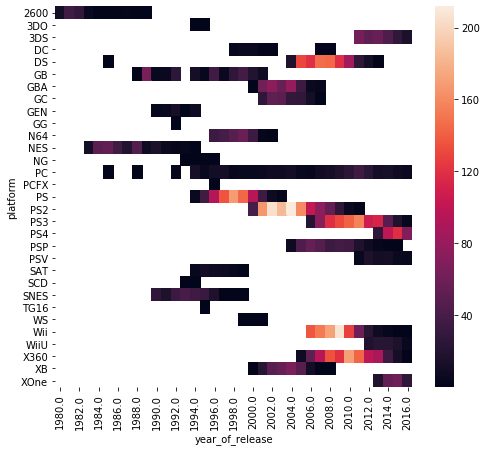

In [26]:
data_plat=data.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))
plt.figure(figsize=(8,7))
sns.heatmap(data_plat)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Для того, чтобы не показывать вспомогательные выводы python типа `<matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90>`, можно в конце строки добавить точку с запятой или `plt.show()` 😉

</div>

Приведена тепловая карта всех приставок с 1985 по 2016. Можно увидеть платформы у которых один производитель, и как платформы приходят на замену старым. Например: Xbox(XOne,XB,X360),Sony(ps,ps2,ps3,ps4),(NES, SNES, Game Boy, Game Boy Advance, Nintendo 64, GameCube, Nintendo DS, Wii, Nintendo 3DS, Wii U) 

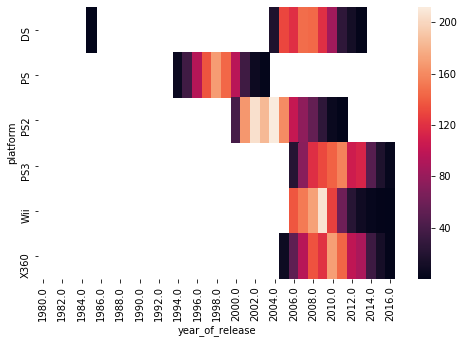

In [27]:
list_platform=['PS2','X360','PS3','Wii','DS','PS']
top_platform=data_plat.query('platform in @list_platform')
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

Платформы с наибольшими продажами.
По тепловой карте видно, что платформа в среднем живет 10-12 лет.Росст продаж происходит через 5-6 лет,в середине жизни приставки.Производитель делает релиз новой платформы примерно через это время, когда начинается спад у предыдущей. В 2006 появились новые платформы, которые стали популярны. Как раз в тот момент, когда продажи PS2 стали падать и когда запустили новую PS3.
По графику видно, что актуальным периодом можно назвать промежуток между 2006 и 2016 годом

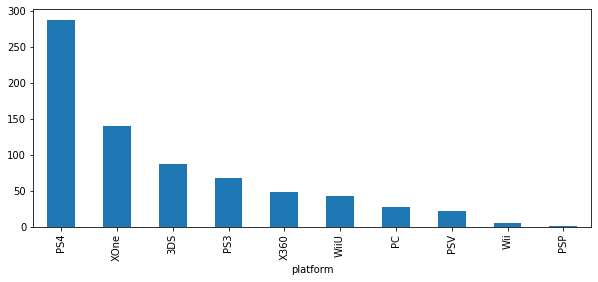

In [28]:
actual_data=data.query('year_of_release>=2014')

actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar")

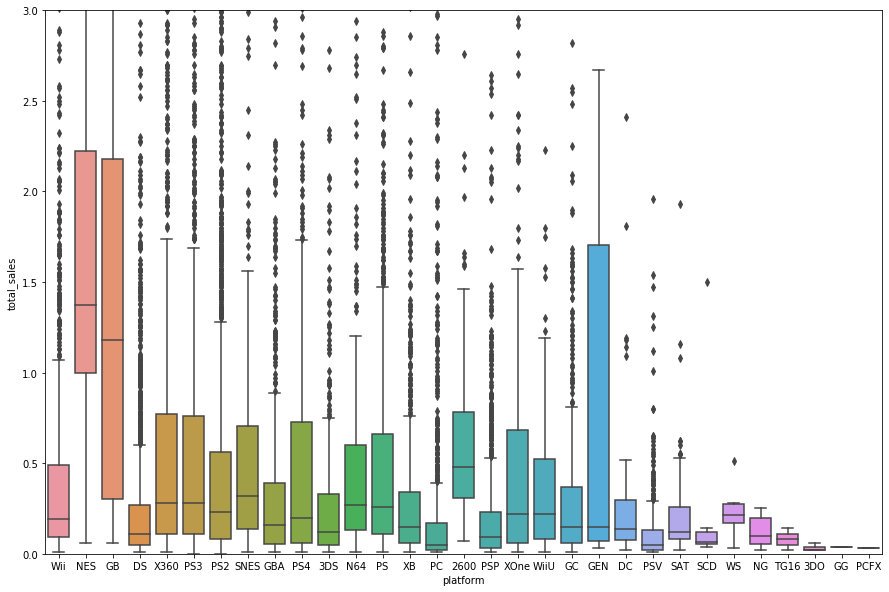

In [29]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='total_sales',data=data)

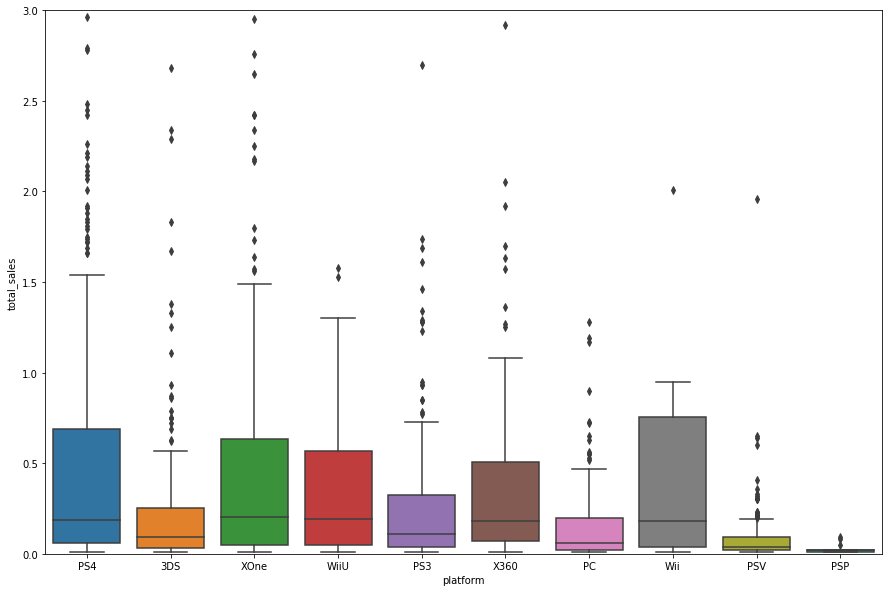

In [30]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='total_sales',data=actual_data)

Межквартальный размах очень похож у платфором PS4,Xone,Wiuu,360 и да,я считаю это самыми перспективными платформами

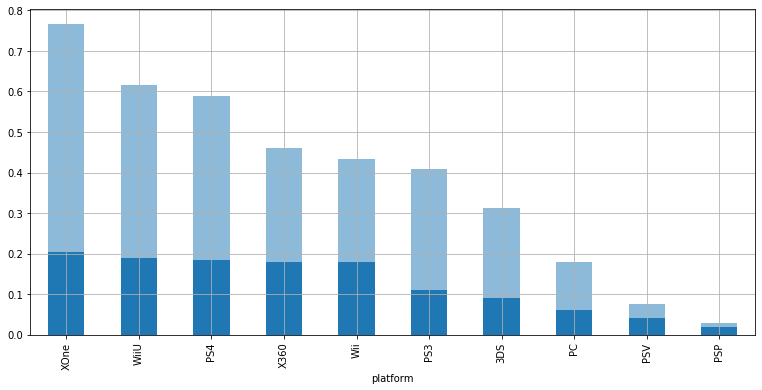

In [31]:
mean_sales=actual_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

median_sales=actual_data.groupby('platform')['total_sales'].median().sort_values(ascending=False)

ax=mean_sales.plot(y='platform',figsize=(13,6),kind='bar',label='mean',alpha=0.5)
median_sales.plot(y='platform',grid=True,figsize=(13,6),kind='bar',label='median',ax=ax)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

Не забывай указывать заголовки и названия осей на графиках. Это необходимо для того, чтобы понять какие именно показатели отображены на графиках (комментарий ко всему проекту).

</div>

Медианные значения сильно отличаются от средних. Везде медиана ниже среднего. 

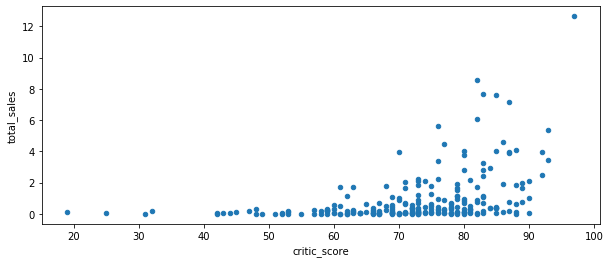

In [32]:
actual_data.query('platform=="PS4"' ).sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4))

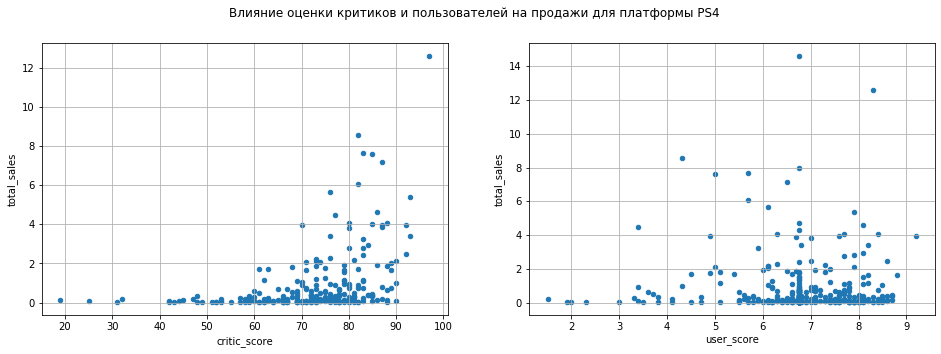

Корреляция user_score-total_sales для платформы PS4 равна -0.02859
Корреляция critic_score-total_sales для платформы PS4 равна 0.40266


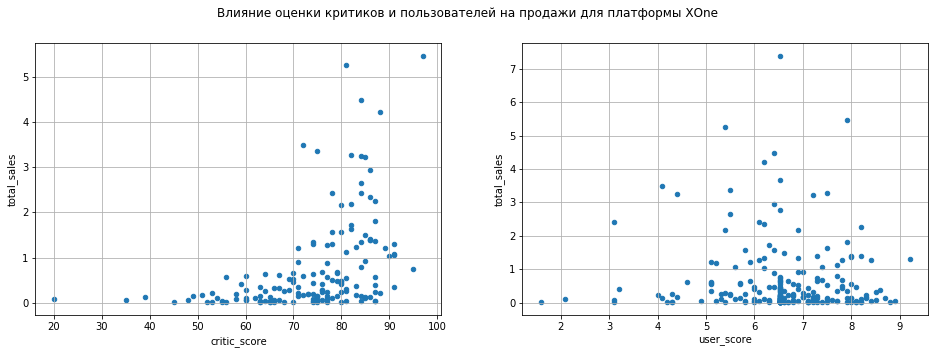

Корреляция user_score-total_sales для платформы XOne равна -0.05509
Корреляция critic_score-total_sales для платформы XOne равна 0.42868


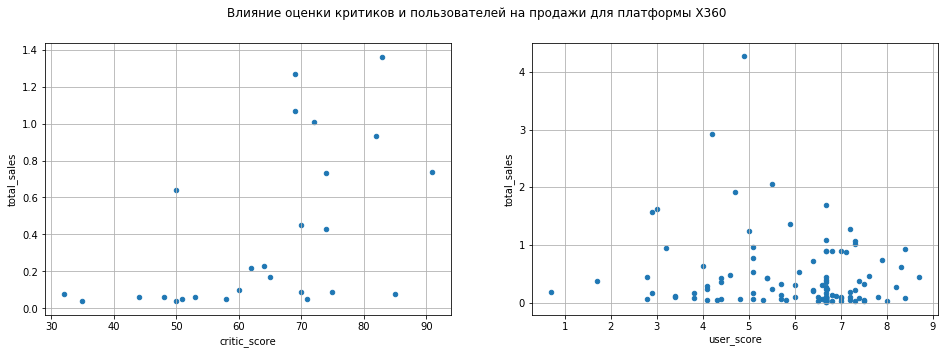

Корреляция user_score-total_sales для платформы X360 равна -0.16621
Корреляция critic_score-total_sales для платформы X360 равна 0.52572


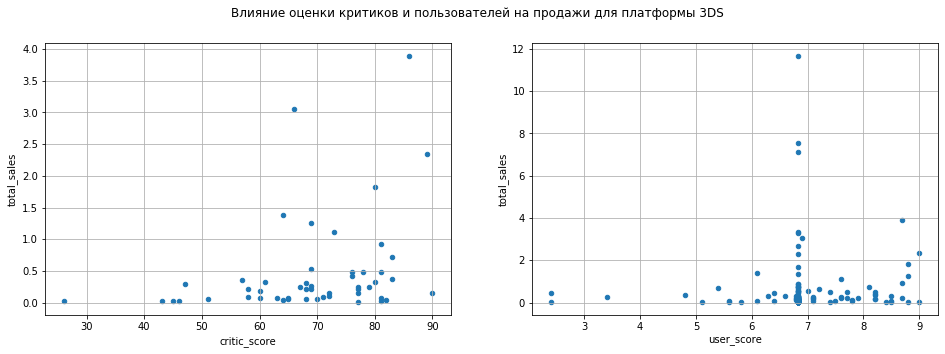

Корреляция user_score-total_sales для платформы 3DS равна 0.07418
Корреляция critic_score-total_sales для платформы 3DS равна 0.31412


In [77]:
def get_corr_scatter(platform, data):
 
    temporary = data.query('platform == @platform')
    temporary = temporary[['user_score','critic_score','total_sales']]
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    temporary.plot(kind='scatter', x='critic_score', y='total_sales', grid = True, ax=axes[0])
    temporary.plot(kind='scatter', x='user_score', y='total_sales', grid = True, ax=axes[1])
    fig.suptitle(f'Влияние оценки критиков и пользователей на продажи для платформы {platform}')
    
    plt.show()
    
    user_sales = temporary.corr().loc['user_score', 'total_sales']
    crit_sales = temporary.corr().loc['critic_score', 'total_sales']
    
    print (f'Корреляция user_score-total_sales для платформы {platform} равна {round(user_sales, 5)}')
    print (f'Корреляция critic_score-total_sales для платформы {platform} равна {round(crit_sales, 5)}')
    
for platform in ['PS4', 'XOne', 'X360', '3DS']:
    get_corr_scatter(platform, actual_data)

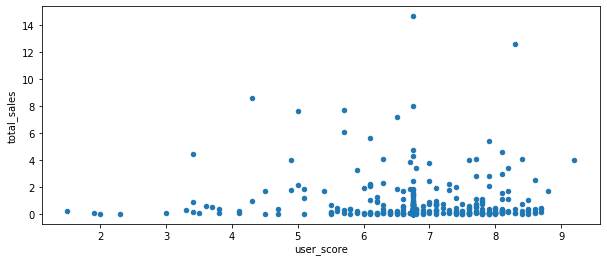

In [33]:
actual_data.query('platform=="PS4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4))

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

А здесь заметь, явно выделяются заполненные значения, не меняют ли они нам сильно статистику? Я бы вообще не трогал их, оставил как есть, т.к пропуски никак не влияют на корреляции, а в последнем блоке их можно удалить в момент определения одномерных массивов

Чем больше балл, там больше продажи. Положительная корреляция. Плотнее всего с оценками пользователей в районе от 6-8 баллов. Что касается оценки критиков, то у них плотнее всего в районе от 60-8- баллов. 

In [34]:
ps4_actual=actual_data.query('platform=="PS4"')
ps4_actual['total_sales'].corr(ps4_actual['user_score'])


-0.02858693622320568

In [35]:
ps4_actual['total_sales'].corr(ps4_actual['critic_score'])

0.40266141068104083

По данным корреляции можно сделать вывод, что зависимость между продажами и отзывами критиков есть, но ниже средней. Корреляция положительная. Чем лучше отзыв критика, тем выше продажи. Отзывы пользователей не так сильно вляют на продажи. Корреляция слабая.

In [36]:
ps4_data = actual_data.loc[(actual_data['total_sales'] <5) 
                               & (actual_data['platform']=='PS4') 
                               & (actual_data['critic_score'].notna()) 
                               & (actual_data['user_score'].notna())]

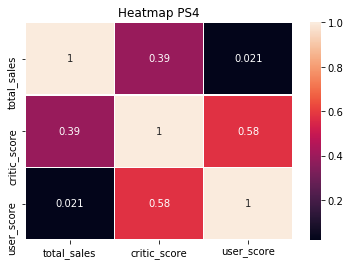

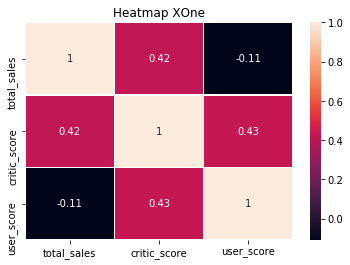

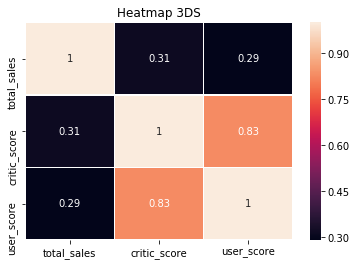

In [37]:
xone_data = actual_data.loc[(actual_data['total_sales'] <5) 
                               & (actual_data['platform']=='XOne') 
                               & (actual_data['critic_score'].notna()) 
                               & (actual_data['user_score'].notna())]

data_3DS = actual_data.loc[(actual_data['total_sales'] <5) 
                               & (actual_data['platform']=='3DS') 
                               & (actual_data['critic_score'].notna()) 
                               & (actual_data['user_score'].notna())]
sns.heatmap(ps4_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap PS4')
plt.show()
sns.heatmap(xone_data[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap XOne')
plt.show()
sns.heatmap(data_3DS[['total_sales','critic_score', 'user_score']].corr(), linewidths=.2,annot = True)
plt.title('Heatmap 3DS')
plt.show()

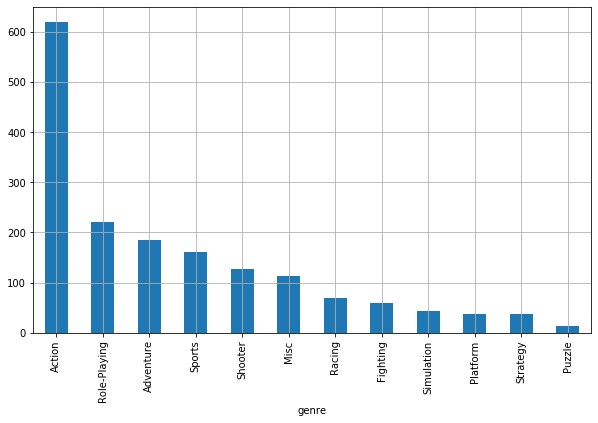

In [38]:
median_sale_genre=actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
count_genre=actual_data.groupby('genre')['total_sales'].count().sort_values(ascending=False)
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar')

Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре puzzle, strategy. Разница в количестве продаж почти в 6,5 раз. Следом по популярности идет жанр Sport

<h2>Составьте портрет пользователя каждого региона</h2>

In [39]:
na_sales_platform=actual_data.pivot_table(index='platform',values=['na_sales','total_sales'],aggfunc=('sum'))

In [40]:
na_sales_platform=na_sales_platform.sort_values(by='na_sales',ascending=False).head(5)
na_sales_platform

,na_sales,total_sales
platform,,
PS4,98.61,288.15
XOne,81.27,140.36
X360,28.30,48.22
3DS,22.64,86.68
PS3,22.05,68.18


Самая популярная платформа в С. Америке- PS4, затем XOne c небольшой разницей. X360 на четвертом месте.

In [41]:
na_sales_platform['% sales']=na_sales_platform['na_sales']/na_sales_platform['total_sales']

In [42]:
na_sales_platform['% sales']

platform
PS4     0.342218
XOne    0.579011
X360    0.586893
3DS     0.261191
PS3     0.323409
Name: % sales, dtype: float64

In [43]:
eu_sales_platform=actual_data.pivot_table(index='platform',values=['eu_sales','total_sales'],aggfunc=('sum'))

In [44]:
eu_sales_platform=eu_sales_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_platform

,eu_sales,total_sales
platform,,
PS4,130.04,288.15
XOne,46.25,140.36
PS3,25.54,68.18
PC,17.97,27.05
3DS,16.12,86.68


Самая популярная платформа в Европе- PS4, затем XOne. На 3 месте PS3.

In [45]:
eu_sales_platform['% sales']=eu_sales_platform['eu_sales']/eu_sales_platform['total_sales']


In [46]:
eu_sales_platform['% sales']

platform
PS4     0.451293
XOne    0.329510
PS3     0.374597
PC      0.664325
3DS     0.185971
Name: % sales, dtype: float64

In [47]:
jp_sales_platform=actual_data.pivot_table(index='platform',values=['jp_sales','total_sales'],aggfunc=('sum'))

In [48]:
jp_sales_platform=jp_sales_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_platform

,jp_sales,total_sales
platform,,
3DS,44.24,86.68
PS4,15.02,288.15
PSV,14.54,22.40
PS3,11.22,68.18
WiiU,7.31,42.98


Самая популярная платформа в Японии 3DS, затем PS4. На 3 месте PSV. 

In [49]:
jp_sales_platform['% sales']=jp_sales_platform['jp_sales']/jp_sales_platform['total_sales']

In [50]:
jp_sales_platform['% sales']

platform
3DS     0.510383
PS4     0.052126
PSV     0.649107
PS3     0.164564
WiiU    0.170079
Name: % sales, dtype: float64

<b>Самые популярные жанры (топ-5)</b>

In [51]:
na_sales_genre=actual_data.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))

In [52]:
na_sales_genre=na_sales_genre.sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


Самый популярный жанр в С. Америке- это Shooter. Затем Action и Sport.

In [53]:
eu_sales_genre=actual_data.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))

In [54]:
eu_sales_genre=eu_sales_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


В Европе самые популярные жанры такие же как и в Америке,только Action на первом месте,затем Shooter и Sport.

In [55]:
jp_sales_genre=actual_data.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))

In [56]:
jp_sales_genre=jp_sales_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


В Японии на первом месте Role-Playing. Потом Action и Fighting.

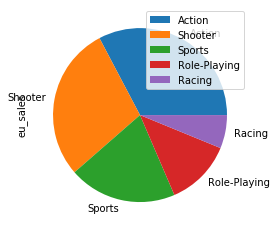

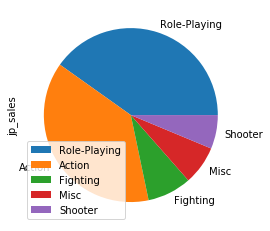

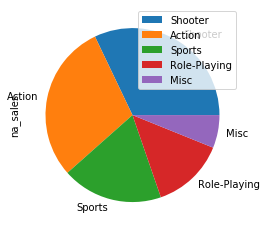

In [57]:
eu_sales_genre.plot(kind='pie',y="eu_sales")
jp_sales_genre.plot(kind='pie',y="jp_sales")
na_sales_genre.plot(kind='pie',y="na_sales")


Европа и Америка очень схожи по жанрам.

<b>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</b>

In [58]:
na_sales_ESRB=actual_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))

In [59]:
na_sales_ESRB=na_sales_ESRB.sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales
rating,
M,96.42
wait,64.72
E,50.74
T,38.95
E10+,33.23


In [60]:
eu_sales_ESRB=actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))

In [61]:
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales
rating,
M,93.44
wait,58.95
E,58.06
T,34.07
E10+,26.16


In [62]:
jp_sales_ESRB=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))

In [63]:
jp_sales_ESRB=jp_sales_ESRB.sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales
rating,
wait,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


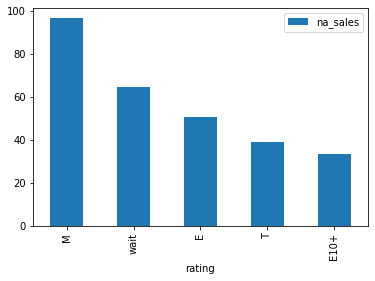

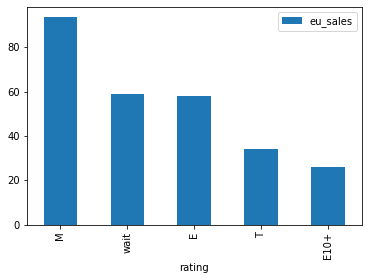

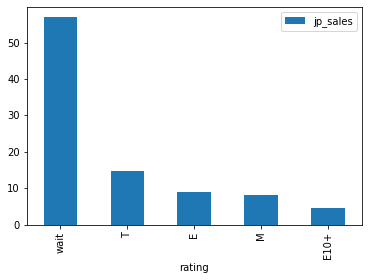

In [64]:
na_sales_ESRB.plot(kind='bar') 
eu_sales_ESRB.plot(kind='bar') 
jp_sales_ESRB.plot(kind='bar') 

Америке, Европе, Японии- E, T, M, E10+. Лидирует E, после T (13 лет и старше), M (от 17) и Е+10 (10+) в Японии гораздо меньше чем в остальных регионах. Можно сделать вывод, что возрастное ограничение влияет на продажи.Натбольшей популярностью пользуются продукты с возрастным ограничением во всех регионах E (Для всех) или T(для подростков 13-19 лет). По сути категория М и Е10+ это таже самая что и Т. Т.е можно считать, что категория Е и Т почти равны.
Что касается жанров, то тут самые продаваемые Action, Sport, Shooter с ориентацией для подростков от 13-19 лет.

<h2>Проверим гипотезы</h2>


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 : Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [65]:
XOne_data=actual_data.query('platform=="XOne"')

In [66]:
PC_data=actual_data.query('platform=="PC"')

In [67]:
alpha=.05 

result=st.ttest_ind(XOne_data['user_score'],PC_data['user_score'],equal_var=False) 


print('Значение p-value:', result.pvalue)


if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу не удалось')

Значение p-value: 0.38547352351378217
Отвергаем нулевую гипотезу не удалось


<b>Вывод</b>
Можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый

H1: средний пользовательский рейтинг жанров Action и Sports различается

In [68]:
sport_data=actual_data.query('genre=="Sports"')

In [69]:
action_data=actual_data.query('genre=="Action"')

In [70]:
alpha=.05 

result=st.ttest_ind(sport_data['user_score'],action_data['user_score'],equal_var=False)


print('Значение p-value:', result.pvalue)


if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу не удалось')

Значение p-value: 1.3932845111170608e-15
Отвергаем нулевую гипотезу


<b>Вывод</b>
Можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

<h2>Вывод</h2>

Из проведенного анализы мы выяснили, самыми перспективными платформами являются xone, wiiu, pc

Самыми популярными жанрами стали:

В европейском регионе: action shooter sports role-playing racing
В японском регионе: role-playing action fighting misc shooter
В северо-американском регионе: shooter action sports misc role-playing
В это же время самыми платформами стали:

Для европейского региона: ps4 xone ps3 pc 3ds
Для японского региона: 3ds ps4 psv ps3 wiuu
Для северо-американского региона: ps4 xone x360 3ds ps3
Кроме того, мы проверили гипотезы и определили:

Средние пользовательские рейтинги платформ Xbox One и PC отличаются
Средние пользовательские рейтинги жанров Action и Sports разные.
Рейтинг влияет на продажи

